In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from astropy.coordinates import SkyCoord
import astropy.units as u

In [13]:
plot_dir = '/Users/mncavieres/Documents/2022-1/Investigacion/plots'

In [48]:
observation_results = pd.read_csv('/Users/mncavieres/Documents/2022-1/Investigacion/Data/Tile1_obs_car.csv', sep= ';')

# New File

In [2]:
with open('/Users/mncavieres/Documents/2022-1/Investigacion/Download Data/dr2') as obs2:
    lines = obs2.readlines()
ar = []
for line in lines[1:]:
    ar.append(line.split())
ar2 = []
for i in ar:
    if len(i) == 21:
        ar2.append(i)
df = pd.DataFrame(np.array(ar2),columns = lines[0].split())
df['Airmass'] = df['Airmass'].astype(float)
df['Seeing'] = df['Seeing'].astype(float)
df['Ellipt'] = df['Ellipt'].astype(float)
df['Maglim'] = df['Maglim'].astype(float)
df['Exptime'] = df['Exptime'].astype(float)

### ESO Grading system

        A - all within constraints; OB completed

        B - mostly within constraints - some constraint is ~10% violated; OB completed

        C - out of constraint - OB set to must repeat

        D - out of constraint, BUT OB set to completed and will not be repeated - this may happen if some constraint is more than ~10% violated, but for some (scientifically valid) reason it is decided not to repeat the observation - this decision is typically taken by the support astronomer not by telescope operator; it happens very rarely

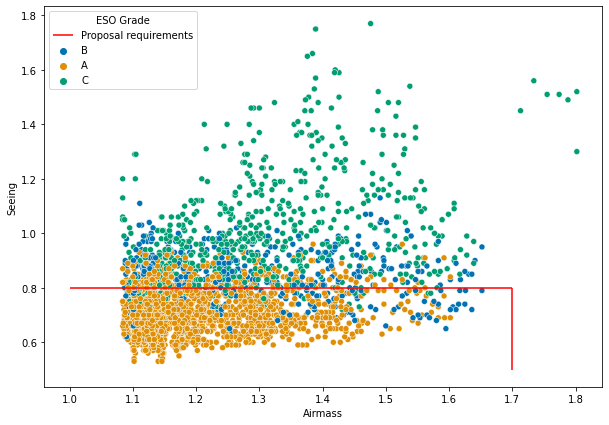

In [16]:
fig, ax = plt.subplots(1,1, figsize = (10,7))
plt.vlines(x =  1.7, ymin= 0.5, ymax= 0.8 , colors = 'r',  label = 'Proposal requirements')
plt.hlines(y = 0.8, xmin = 1, xmax= 1.7 ,colors= 'r')
sns.scatterplot(data = df, x = 'Airmass', y= 'Seeing', hue= 'ESO_Grade', palette=  'colorblind')
plt.legend(title = 'ESO Grade')
plt.savefig(f'{plot_dir}/obs/airmass_seeing.png', dpi = 1000, bbox_inches = 'tight')


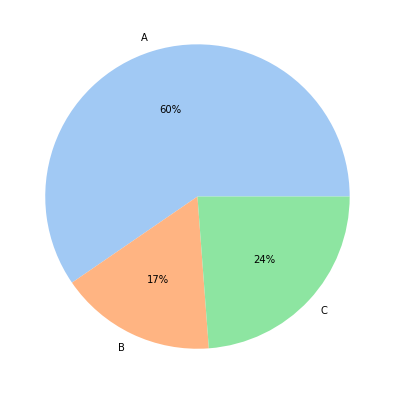

In [18]:
colors = sns.color_palette('pastel')[0:3]
stats = [len(df.loc[df['ESO_Grade'] == 'A']), len(df.loc[df['ESO_Grade'] == 'B']), len(df.loc[df['ESO_Grade'] == 'C'])]
labels = ['A', 'B', 'C']
fig, ax = plt.subplots(1,1, figsize = (10,7))
ax.pie(stats, labels= labels, colors= colors, autopct='%.0f%%')
plt.savefig(f'{plot_dir}/obs/pie_obs.png', dpi = 1000, bbox_inches = 'tight')
plt.show()

In [7]:
stats

[1649]

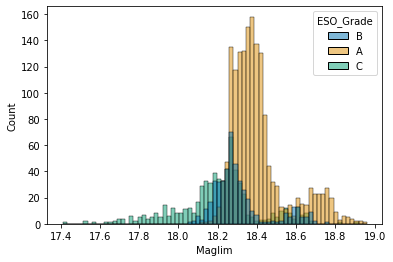

In [19]:
sns.histplot(data = df, x= 'Maglim', hue= 'ESO_Grade', palette=  'colorblind')
plt.savefig(f'{plot_dir}/obs/maglim_hist.png', dpi = 1000, bbox_inches = 'tight')

In [10]:
coords = SkyCoord(df.RA, df.DEC, unit = 'deg')

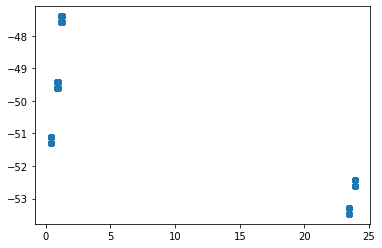

In [11]:
plt.scatter(coords.ra.degree, coords.dec.degree)

In [13]:
eso_arch = pd.read_csv('/Users/mncavieres/Documents/2022-1/Investigacion/Download Data/wdb_query_35534_eso.csv')
coords_eso = SkyCoord(eso_arch.RA, eso_arch.DEC, unit = 'deg')
eso_arch['ra'] = coords_eso.ra.degree
eso_arch['dec'] = coords_eso.dec.degree

In [14]:
eso_arch.columns

Index(['OBJECT', 'RA', 'DEC', 'Program_ID', 'Instrument', 'Category', 'Type',
       'Mode', 'Dataset ID', 'Release_Date', 'TPL ID', 'TPL START', 'Exptime',
       'filter_lambda_min', 'filter_lambda_max', 'Filter', 'MJD-OBS',
       'Airmass', 'DIMM Seeing at Start', 'ra', 'dec'],
      dtype='object')

<AxesSubplot:xlabel='ra', ylabel='dec'>

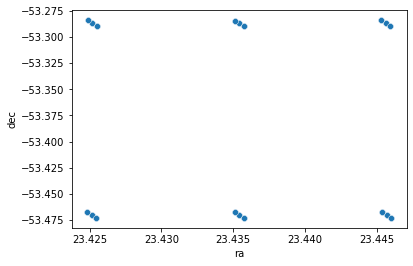

In [15]:
sns.scatterplot(data = eso_arch.loc[ eso_arch.ra < 23.5], x = 'ra', y = 'dec')

In [16]:
tile2 = SkyCoord( '23:53:46.15' , '-52:32:21.7', unit = 'deg' )
tile1 = SkyCoord('23:26:07.46', '-53:28:13.7', unit= 'deg')

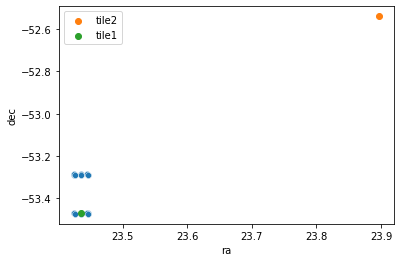

In [19]:

sns.scatterplot(data = eso_arch.loc[ eso_arch.ra < 23.5], x = 'ra', y = 'dec')
plt.scatter(tile2.ra.degree, tile2.dec.degree, label = 'tile2')
plt.scatter(tile1.ra.degree, tile1.dec.degree, label = 'tile1')
plt.legend()

In [20]:
eso_arch.loc[ eso_arch.ra < 23.5]

,OBJECT,RA,DEC,Program_ID,Instrument,Category,Type,Mode,Dataset ID,Release_Date,...,TPL START,Exptime,filter_lambda_min,filter_lambda_max,Filter,MJD-OBS,Airmass,DIMM Seeing at Start,ra,dec
0,NO NAME,23:25:30.70,-53:17:12.9,098.B-0510(A),VIRCAM,SCIENCE,OBJECT,"IMAGE,JITTER",VCAM.2016-09-10T01:22:35.279,Sep 10 2017,...,2016-09-10T01:22:21,28.0,1992.0,2301.0,"<A HREF=""/wdb/wdb/eso/filter_wavelengths/query...",57641.057353,1.491,0.64,23.425194,-53.286917
1,NO NAME,23:25:29.66,-53:17:02.1,098.B-0510(A),VIRCAM,SCIENCE,OBJECT,"IMAGE,JITTER",VCAM.2016-09-10T01:23:24.301,Sep 10 2017,...,2016-09-10T01:22:21,28.0,1992.0,2301.0,"<A HREF=""/wdb/wdb/eso/filter_wavelengths/query...",57641.057920,1.487,0.64,23.424906,-53.283917
2,NO NAME,23:25:31.89,-53:17:22.2,098.B-0510(A),VIRCAM,SCIENCE,OBJECT,"IMAGE,JITTER",VCAM.2016-09-10T01:24:09.716,Sep 10 2017,...,2016-09-10T01:22:21,28.0,1992.0,2301.0,"<A HREF=""/wdb/wdb/eso/filter_wavelengths/query...",57641.058446,1.484,0.68,23.425525,-53.289500
3,NO NAME,23:26:07.54,-53:17:13.2,098.B-0510(A),VIRCAM,SCIENCE,OBJECT,"IMAGE,JITTER",VCAM.2016-09-10T01:25:00.279,Sep 10 2017,...,2016-09-10T01:22:21,28.0,1992.0,2301.0,"<A HREF=""/wdb/wdb/eso/filter_wavelengths/query...",57641.059031,1.483,0.72,23.435428,-53.287000
4,NO NAME,23:26:06.35,-53:17:03.2,098.B-0510(A),VIRCAM,SCIENCE,OBJECT,"IMAGE,JITTER",VCAM.2016-09-10T01:25:43.929,Sep 10 2017,...,2016-09-10T01:22:21,28.0,1992.0,2301.0,"<A HREF=""/wdb/wdb/eso/filter_wavelengths/query...",57641.059536,1.480,0.68,23.435097,-53.284222
5,NO NAME,23:26:08.58,-53:17:23.2,098.B-0510(A),VIRCAM,SCIENCE,OBJECT,"IMAGE,JITTER",VCAM.2016-09-10T01:26:29.961,Sep 10 2017,...,2016-09-10T01:22:21,28.0,1992.0,2301.0,"<A HREF=""/wdb/wdb/eso/filter_wavelengths/query...",57641.060069,1.477,0.68,23.435717,-53.289778
6,NO NAME,23:26:44.23,-53:17:12.9,098.B-0510(A),VIRCAM,SCIENCE,OBJECT,"IMAGE,JITTER",VCAM.2016-09-10T01:27:20.963,Sep 10 2017,...,2016-09-10T01:22:21,28.0,1992.0,2301.0,"<A HREF=""/wdb/wdb/eso/filter_wavelengths/query...",57641.060659,1.476,0.55,23.445619,-53.286917
7,NO NAME,23:26:43.03,-53:17:02.2,098.B-0510(A),VIRCAM,SCIENCE,OBJECT,"IMAGE,JITTER",VCAM.2016-09-10T01:28:06.368,Sep 10 2017,...,2016-09-10T01:22:21,28.0,1992.0,2301.0,"<A HREF=""/wdb/wdb/eso/filter_wavelengths/query...",57641.061185,1.473,0.55,23.445286,-53.283944
8,NO NAME,23:26:45.28,-53:17:22.2,098.B-0510(A),VIRCAM,SCIENCE,OBJECT,"IMAGE,JITTER",VCAM.2016-09-10T01:28:51.804,Sep 10 2017,...,2016-09-10T01:22:21,28.0,1992.0,2301.0,"<A HREF=""/wdb/wdb/eso/filter_wavelengths/query...",57641.061711,1.470,0.55,23.445911,-53.289500
9,NO NAME,23:26:44.47,-53:28:11.6,098.B-0510(A),VIRCAM,SCIENCE,OBJECT,"IMAGE,JITTER",VCAM.2016-09-10T01:29:40.505,Sep 10 2017,...,2016-09-10T01:22:21,28.0,1992.0,2301.0,"<A HREF=""/wdb/wdb/eso/filter_wavelengths/query...",57641.062274,1.468,0.60,23.445686,-53.469889


In [269]:
tile1.ra.degree

23.435405555555555

# SQL attempt

In [278]:
lines[0].split()

['#',
 'Filename',
 'Chip',
 'Object',
 'Name',
 'Coords',
 'Obs',
 'date',
 'Band',
 'Airmass',
 'Exptime',
 'Seeing',
 'Ellipt',
 'ZP',
 'ZPerr',
 'Maglim',
 'WCS',
 'rms',
 'Version',
 'OB',
 'Status',
 'ESO',
 'Grade',
 'Last',
 'Updated',
 'OB',
 'Name']

In [280]:
with open('/Users/mncavieres/Documents/2022-1/Investigacion/Data/t1drv4') as obsv2:
    lines = obsv2.readlines()
ar = []
for line in lines[1:]:
    ar.append(line.split())
arv2 = []
for i in arv2:
    if len(i) == 21:
        ar2.append(i)

df2 = pd.DataFrame(np.array(arv2),columns = lines[0].split())
df2['Airmass'] = df['Airmass'].astype(float)
df2['Seeing'] = df['Seeing'].astype(float)
df2['Ellipt'] = df['Ellipt'].astype(float)
df2['Maglim'] = df['Maglim'].astype(float)
df2['Exptime'] = df['Exptime'].astype(float)

ValueError: Empty data passed with indices specified.

In [273]:
df2

,Filename,Chip,Object,Name,RA,DEC,Obs_date,Band,Airmass,Exptime,...,Ellipt,ZP,ZPerr,Maglim,WCS_rms,Version,OB_Status,ESO_Grade,Last_Updated,OB_Name
0,v20160909_00055_st,1,No,name,23:25:30.70,-53:17:12.9,2016-09-10T01:22:35.2720,Ks,1.491,84.0,...,0.06,22.97,0.02,18.08,0.18,1.3,Completed,B,10-02-2017,MS_DV1_V5_OB61
1,v20160909_00055_st_tl,1,No,name,23:25:30.70,-53:17:12.9,2016-09-10T01:22:35.2720,Ks,1.491,84.0,...,0.08,23.00,0.01,18.49,0.16,1.3,Completed,B,10-02-2017,MS_DV1_V5_OB61
2,v20160909_00058_st,1,No,name,23:26:07.54,-53:17:13.2,2016-09-10T01:25:00.2722,Ks,1.483,84.0,...,0.11,23.00,0.03,18.18,0.16,1.3,Completed,B,10-02-2017,MS_DV1_V5_OB61
3,v20160909_00061_st,1,No,name,23:26:44.23,-53:17:12.9,2016-09-10T01:27:20.9485,Ks,1.476,84.0,...,0.11,22.99,0.02,18.11,0.16,1.3,Completed,B,10-02-2017,MS_DV1_V5_OB61
4,v20160909_00064_st,1,No,name,23:26:44.47,-53:28:11.6,2016-09-10T01:29:40.5049,Ks,1.468,84.0,...,0.10,23.00,0.02,18.17,0.16,1.3,Completed,B,10-02-2017,MS_DV1_V5_OB61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,v20161219_00104_st,1,No,name,01:12:56.07,-47:24:04.3,2016-12-20T01:25:14.7366,Ks,1.137,84.0,...,0.05,22.97,0.03,18.37,0.19,1.3,Completed,A,03-04-2017,MS_DV6_V5_OB52
2764,v20161219_00107_st,1,No,name,01:13:28.49,-47:24:04.1,2016-12-20T01:27:36.8338,Ks,1.139,84.0,...,0.06,22.97,0.02,18.38,0.21,1.3,Completed,A,03-04-2017,MS_DV6_V5_OB52
2765,v20161219_00110_st,1,No,name,01:13:28.66,-47:35:02.9,2016-12-20T01:30:01.8729,Ks,1.144,84.0,...,0.05,22.98,0.02,18.39,0.20,1.3,Completed,A,03-04-2017,MS_DV6_V5_OB52
2766,v20161219_00113_st,1,No,name,01:12:56.08,-47:35:03.8,2016-12-20T01:32:24.9510,Ks,1.148,84.0,...,0.05,22.97,0.03,18.37,0.20,1.3,Completed,A,03-04-2017,MS_DV6_V5_OB52
